# Visualizing networks

While creating and analyzing graphs in code is definitely the best way to study network data, sometimes it is useful to see the network. For this there are several methods that can be employed that work well with the NetworkX library. Here we will show one way of visualizing a network.

In [1]:
import networkx as nx

The NetworkX library has several methods for *drawing* a graph, which outputs a visualization of the network. This makes use of the **Matplotlib** library for Python, in particular the **pyplot** part. For more details on this library please see https://matplotlib.org/. 

Once a network is drawn the output can be manipulated using the basic functions for figures of **pyplot**.

We proceed by importing the library. 

In [2]:
import matplotlib.pyplot as plt

As a simple example, we will create a cycle graph on 10 nodes using the `cycle_graph` function from NetworkX. Then we use the `draw_networkx` function to visuzalize the graph. See https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html for more details on this function.

**NOTE:** Currently (August 2023) the older `draw` function seems to cause problems. It is therefor recommended to use the new `draw_networkx` function.

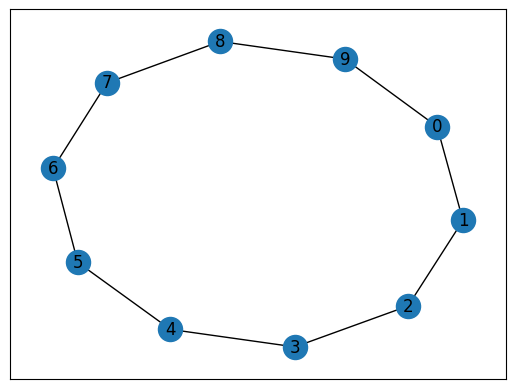

In [3]:
### We create a cycle graph
C = nx.cycle_graph(10)

### Now we draw it
nx.draw_networkx(C)

This looks quite good. But that is a coincidence. Let's see what happens if we draw a complete graph on 25 nodes instead.

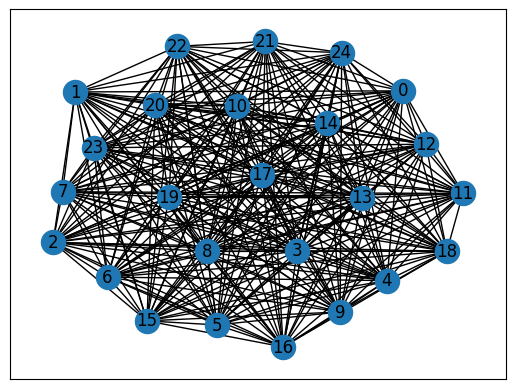

In [4]:
### Create a complete graph on 25 nodes
K = nx.complete_graph(25)

### Draw the graph
nx.draw_networkx(K)

It is clear that this is not a useful visualization. It this kind of visual representation of a graph is often referred to as a *hair ball picture*. 

To get better control of the output of the draw function it would help if we could specify the postition of the nodes in the figure. This can be done using the `pos` parameter of the function. It takes a dictionary with nodes as keys and coordinates as values. While we can create this dictionary from scratch and define the coordinates of each node manually, NetworkX has functions for creating positions of nodes for a certain situations. These are so-called `layouts` and there are many different ones.

For the next example we will display the complete graph using the circular layout `nx_circular_layout`.

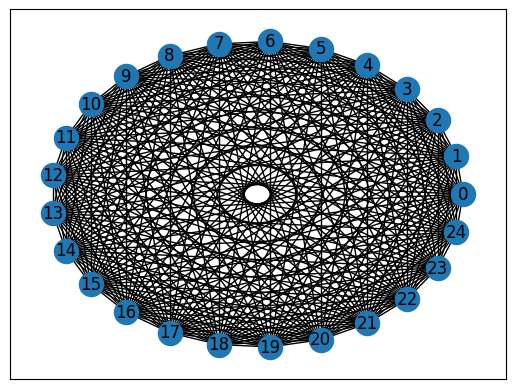

In [5]:
### Nodes with circular positions
nx.draw_networkx(K, pos=nx.circular_layout(K))

To help understand what the position dictionary should look like, here is the printed dictionary that is created for the graph using `circular_layout`.

In [6]:
print(nx.circular_layout(K))

{0: array([1.00000000e+00, 1.19209288e-09]), 1: array([0.96858317, 0.2486899 ]), 2: array([0.87630666, 0.4817537 ]), 3: array([0.72896862, 0.68454712]), 4: array([0.53582675, 0.84432797]), 5: array([0.30901698, 0.95105653]), 6: array([0.06279051, 0.99802671]), 7: array([-0.18738129,  0.98228721]), 8: array([-0.42577935,  0.90482698]), 9: array([-0.63742396,  0.77051322]), 10: array([-0.80901697,  0.58778524]), 11: array([-0.9297764,  0.3681246]), 12: array([-0.99211469,  0.12533319]), 13: array([-0.99211469, -0.12533313]), 14: array([-0.92977646, -0.36812454]), 15: array([-0.80901691, -0.58778529]), 16: array([-0.63742379, -0.77051334]), 17: array([-0.42577944, -0.90482698]), 18: array([-0.18738135, -0.98228721]), 19: array([ 0.06279057, -0.99802671]), 20: array([ 0.30901713, -0.95105646]), 21: array([ 0.53582657, -0.84432803]), 22: array([ 0.72896851, -0.68454717]), 23: array([ 0.87630666, -0.4817537 ]), 24: array([ 0.96858317, -0.24868981])}


The default setting for the `draw_networkx` function is the *spring layout*. This is a layout that is based on a physics system. Very briefly, each edge is considered as a spring and the final positions are computed based on the stable configuration of the system.

**NOTE:** Since the spring layout has to compute some *physics* the resulting position of the nodes can (and often will) be different each time you run the code.

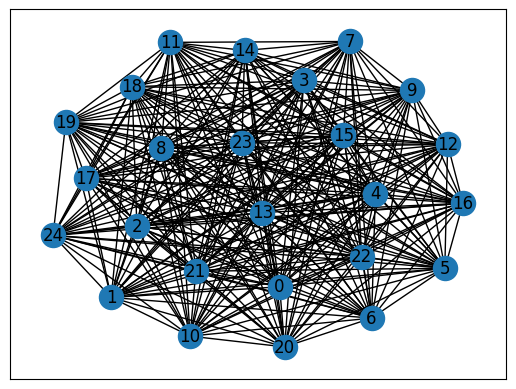

In [7]:
### Using the spring layout we get the same picture as in the first case.
nx.draw_networkx(K, pos=nx.spring_layout(K))

# Exercises

**Exercise 1** Use the code below to generate a graph on 9 nodes and display it using a cricular layout.

In [8]:
### Creating a graph on 9 nodes
G = nx.Graph()

G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(3,6)
G.add_edge(4,5)
G.add_edge(4,7)
G.add_edge(5,6)
G.add_edge(5,8)
G.add_edge(6,9)
G.add_edge(7,8)
G.add_edge(8,9)

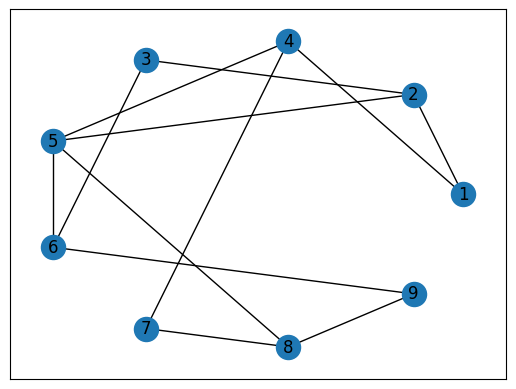

In [9]:
### Your solution

nx.draw_networkx(G, pos=nx.circular_layout(G))

**Exercise 2** Now you are going to create a specific layout for this graph. Create positions for the nodes such that node 5 is at the origin of the plain and the other nodes are at the adjacent lattice points with node 1 at the top left, node 2 at above node 5, ... and node 9 at the bottom right. Then visualize the graph using these positions.

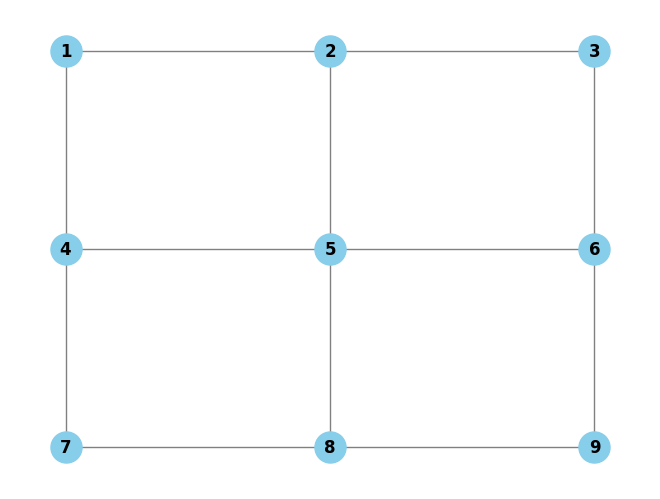

In [10]:
### Your solution

positions = {
    1: (-1, 1),   # Node 1 is at (-1, 1) - top left
    2: (0, 1),    # Node 2 is at (0, 1) - directly above node 5
    3: (1, 1),    # Node 3 is at (1, 1) - top right
    4: (-1, 0),   # Node 4 is at (-1, 0) - left of node 5
    5: (0, 0),    # Node 5 is at (0, 0) - origin
    6: (1, 0),    # Node 6 is at (1, 0) - right of node 5
    7: (-1, -1),  # Node 7 is at (-1, -1) - bottom left
    8: (0, -1),   # Node 8 is at (0, -1) - directly below node 5
    9: (1, -1)    # Node 9 is at (1, -1) - bottom right
}

nx.draw(G, pos=positions, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_weight='bold', edge_color='gray')


**Exercise 3** The `draw_networkx` function has many more parameters that allow us to manipulate the visualization. In this exercise you will change the sizes of the nodes using the `node_size` parameter. 

Create an array of node sizes such that the size of node $i$ is equal to $10^{d_i}$, with $d_i$ the degree of node $i$. Then visualize the graph using the grid positions from the previous exercise and these node sizes.

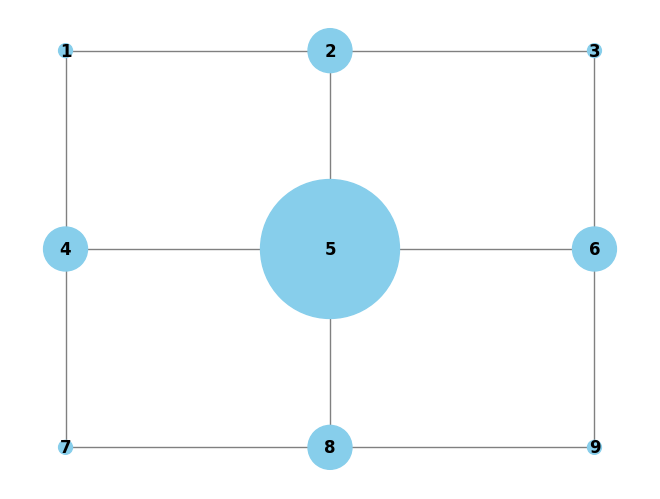

In [11]:
### Your solution

positions = {
    1: (-1, 1),   # Node 1 is at (-1, 1) - top left
    2: (0, 1),    # Node 2 is at (0, 1) - directly above node 5
    3: (1, 1),    # Node 3 is at (1, 1) - top right
    4: (-1, 0),   # Node 4 is at (-1, 0) - left of node 5
    5: (0, 0),    # Node 5 is at (0, 0) - origin
    6: (1, 0),    # Node 6 is at (1, 0) - right of node 5
    7: (-1, -1),  # Node 7 is at (-1, -1) - bottom left
    8: (0, -1),   # Node 8 is at (0, -1) - directly below node 5
    9: (1, -1)    # Node 9 is at (1, -1) - bottom right
}

# Step 3: Calculate node sizes based on the degree of each node
node_sizes = [10 ** G.degree(node) for node in G.nodes]
nx.draw(G, pos=positions, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')
